# Proyek Analisis Data: Bike_Share
- **Nama:** Muhammad Wahyu Prastyo
- **Email:** 111202214407@mhs.dinus.ac.id
- **ID Dicoding:** MC007D5Y0815

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Cuaca (Musim) Dalam Penyewaan Sepeda?
- Apkah Hari Kerja Dan Hari Libur Mempengaruhi Penyewaan Sepeda ?

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install streamlit
!pip install streamlit babel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')


## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita bisa Melihat Dari Kdua Data yang Ada

### Assessing Data

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Pada Kdua data yang ada Tidak ada Missing Values

### Cleaning Data

In [8]:
print("Missing values per kolom:")
print(df_day.isnull().sum())

# Cek jumlah duplikasi pada data day
print("\nJumlah baris duplikat:", df_day.duplicated().sum())

Missing values per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah baris duplikat: 0


In [9]:
print("Missing values per kolom:")
print(df_hour.isnull().sum())

# Cek jumlah duplikasi pada data hour
print("\nJumlah baris duplikat:", df_hour.duplicated().sum())

Missing values per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah baris duplikat: 0


In [10]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [11]:
# Tambah Kolom nama Hari
df_day["day_of_week"] = df_day["dteday"].dt.day_name()
df_hour["day_of_week"] = df_hour["dteday"].dt.day_name()

# Tambah Kolom Nama Musim Karena season di sini belum Jelas
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season_name"] = df_day["season"].map(season_mapping)
df_hour["season_name"] = df_hour["season"].map(season_mapping)

# Mapping hari kerja
day_map = {0: "Hari Libur", 1: "Hari Kerja"}
df_day['workingday'] = df_day['workingday'].map(day_map)


**Insight:**
- Mengubah Typedata Kolom dtday & Check Apakah Ada Duplicates Atau tidak
- Menambah Kolom Baru untuk Analisis

## Exploratory Data Analysis (EDA)

In [12]:
print("Informasi Dataset Day:")
print(df_day.info())

print("\nInformasi Dataset Hour:")
print(df_hour.info())

print("\nStatistik Deskriptif - Day.csv:")
print(df_day.describe())

print("\nStatistik Deskriptif - Hour.csv:")
print(df_hour.describe())


Informasi Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   yr           731 non-null    int64         
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    object        
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64

### Explore ...

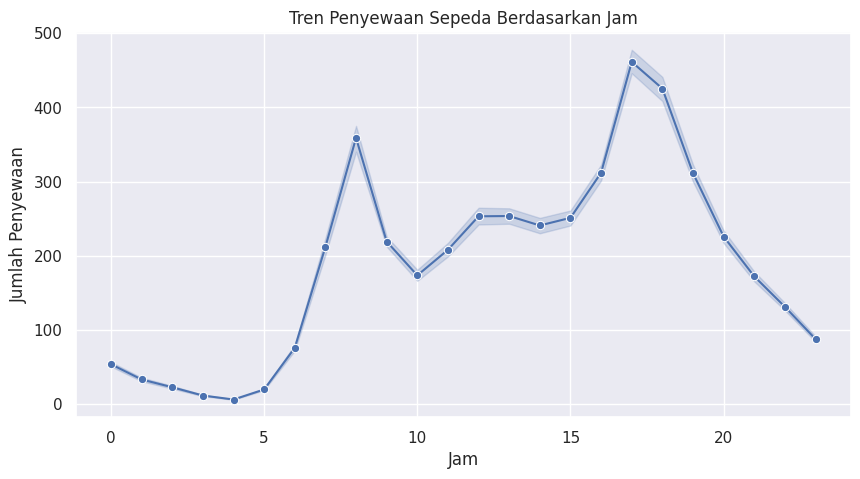

In [13]:
# Penyewaan Pada Jam Kerja
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=df_hour, marker='o', color='b')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.grid()
plt.show()

**Insight:**
- Penyewaan sepeda paling tinggi terjadi pada jam 08:00 dan 17:00, kemungkinan besar karena jam berangkat dan pulang kerja.
- Penyewaan sepeda paling rendah terjadi pada dini hari (00:00 - 05:00).


<ipython-input-14-53ea30ba0afd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_day, palette='coolwarm')


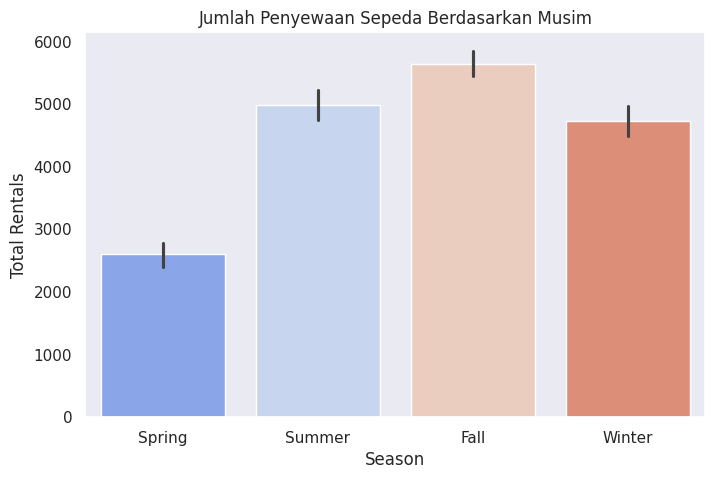

In [14]:
# Visualisasi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=df_day, palette='coolwarm')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.show()

**Insight:**
- Musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya.
- Penyewaan sepeda cenderung lebih rendah di musim dingin, kemungkinan karena cuaca yang kurang mendukung.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-15-e8807a7e9723>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_day, palette='coolwarm', estimator=sum)


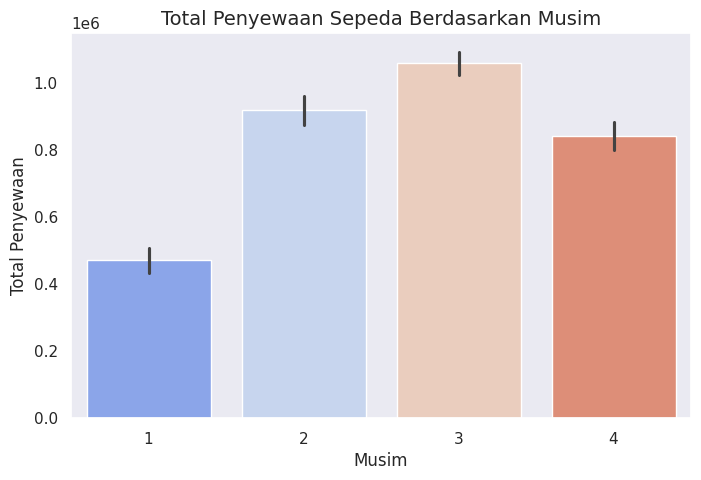

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=df_day, palette='coolwarm', estimator=sum)

plt.title("Total Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.show()

**Insight:**
- Pada Musim Ke 3 (Fall) Penyewa Lebih Tinggi
- Pada Musim Dingin Penyewaan Lebih Rendah (Musim ke 1)

### Pertanyaan 2:

<ipython-input-16-2b3283d9f0c4>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kategori Hari", loc="upper right")


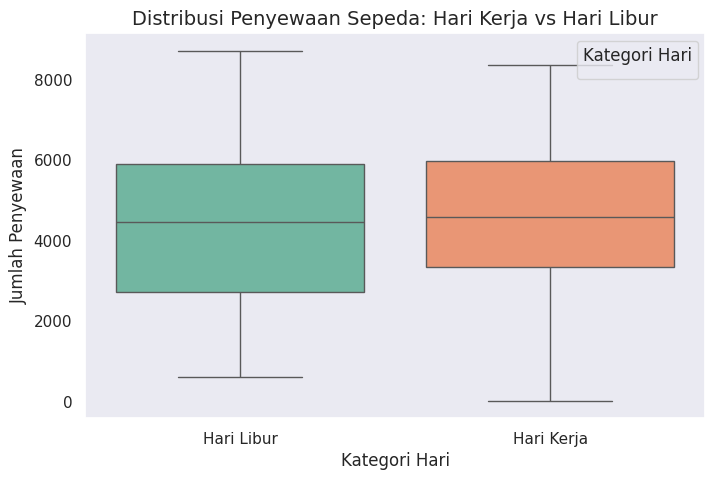

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=df_day, hue='workingday', dodge=False, palette="Set2")

plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur", fontsize=14)
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Kategori Hari", loc="upper right")
plt.show()

**Insight:**
- Tidak ada Prbedaan Mencolok pada Gambar jadi mungkin sedikit berpengaruh
- Pada Hari kerja Sdikit lbih Tinggi dalam Penywaan Sepdanya

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim berpengaruh signifikan dalam penyewaan sepeda. Musim gugur menjadi puncak tertinggi, sedangkan musim semi memiliki penyewaan paling rendah.
- Hari kerja dan hari libur menunjukkan pola penyewaan yang berbeda. Hari kerja lebih didominasi oleh jam commuting (pagi & sore), sementara hari libur lebih merata sepanjang hari.


## Dashboard

In [25]:
merged_data = pd.merge(df_hour, df_day, on="dteday", suffixes=("_hour", "_day"))
# Simpan hasilnya ke CSV baru
merged_data.to_csv("merged_day_hour.csv", index=False)

In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan Streamlit
st.set_page_config(page_title="Analisis Data Share Bike", layout="wide")

# Load dan gabungkan data tanpa upload
@st.cache_data
def load_data():
    day_data = pd.read_csv("day.csv")
    hour_data = pd.read_csv("hour.csv")

    day_data['dteday'] = pd.to_datetime(day_data['dteday'])
    hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

    # Gabungkan berdasarkan tanggal
    merged_data = pd.merge(hour_data, day_data, on="dteday", suffixes=("_hour", "_day"))

    return merged_data

data = load_data()

# Sidebar - Pilih rentang tanggal
st.sidebar.header("Opsi Analisis")
start_date = st.sidebar.date_input("Tanggal Mulai", data['dteday'].min())
end_date = st.sidebar.date_input("Tanggal Akhir", data['dteday'].max())

# Filter data berdasarkan rentang tanggal
filtered_data = data[(data['dteday'] >= pd.to_datetime(start_date)) & (data['dteday'] <= pd.to_datetime(end_date))]

show_summary = st.sidebar.checkbox("Tampilkan Ringkasan Data")
show_usage_trend = st.sidebar.checkbox("Tampilkan Tren Penggunaan")
show_correlation = st.sidebar.checkbox("Tampilkan Korelasi Musim dan Hari Libur")
show_season_impact = st.sidebar.checkbox("Tampilkan Pengaruh Musim")

st.header("Dashboard Analisis Data Share Bike")
st.write(f"### Data dalam rentang {start_date} hingga {end_date}")
st.write(filtered_data.head())

if show_summary:
    st.subheader("Ringkasan Data")
    st.write(filtered_data.describe())
    st.write("Jumlah Data yang Hilang:")
    st.write(filtered_data.isnull().sum())

if show_usage_trend:
    st.subheader("Tren Penggunaan Sepeda")
    usage_trend = filtered_data.groupby(filtered_data['dteday'].dt.to_period("M")).sum(numeric_only=True)
    plt.figure(figsize=(10,5))
    sns.lineplot(x=usage_trend.index.astype(str), y=usage_trend['cnt_hour'])
    plt.xticks(rotation=45)
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Penggunaan")
    plt.title("Tren Penggunaan Sepeda Bulanan")
    st.pyplot(plt)

if show_correlation:
    st.subheader("Korelasi Musim dan Hari Libur terhadap Penggunaan")
    plt.figure(figsize=(8,5))
    corr_cols = ['season_hour', 'holiday_hour', 'cnt_hour']
    sns.heatmap(filtered_data[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    st.pyplot(plt)

if show_season_impact:
    st.subheader("Pengaruh Musim terhadap Penggunaan Sepeda")
    season_impact = filtered_data.groupby('season_hour', as_index=False)['cnt_hour'].mean()
    plt.figure(figsize=(8,5))
    sns.barplot(x=season_impact['season_hour'], y=season_impact['cnt_hour'], palette="viridis")
    plt.xlabel("Musim")
    plt.ylabel("Rata-rata Penggunaan")
    plt.title("Pengaruh Musim terhadap Penggunaan Sepeda")
    st.pyplot(plt)


Overwriting app.py


In [27]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.59.120:8501

⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://brave-otters-think.loca.lt
/content/app.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_impact['season_hour'], y=season_impact['cnt_hour'], palette="viridis")
  Stopping...
^C
